--EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast



In [4]:
df_peliculas=pd.read_csv("Datasets\movies_FINAL.csv")
df_peliculas.head()

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\jessi\AppData\Local\Temp\ipykernel_3928\2661221537.py:1: SyntaxWarning: invalid escape sequence '\m'
  df_peliculas=pd.read_csv("Datasets\movies_FINAL.csv")


,adult,budget,homepage,movie_id,imdb_id,original_language,original_title,overview,popularity,release_date,...,title,video,vote_average,vote_count,collection_name,collection_backdrop_path,company_names_array,countries_names_array,languages_names_array,genres_names_array
0,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,...,Toy Story,False,7.7,5415,Toy Story Collection,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,['Pixar Animation Studios'],['United States of America'],['English'],"['Animation', 'Comedy', 'Family']"
1,False,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,...,Jumanji,False,6.9,2413,NaN,NaN,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['English', 'Français']","['Adventure', 'Fantasy', 'Family']"
2,False,0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,...,Grumpier Old Men,False,6.5,92,Grumpy Old Men Collection,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],['English'],"['Romance', 'Comedy']"
3,False,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,...,Waiting to Exhale,False,6.1,34,NaN,NaN,['Twentieth Century Fox Film Corporation'],['United States of America'],['English'],"['Comedy', 'Drama', 'Romance']"
4,False,0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,...,Father of the Bride Part II,False,5.7,173,Father of the Bride Collection,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],['English'],['Comedy']


In [3]:
df_peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adult                     45463 non-null  bool   
 1   budget                    45463 non-null  int64  
 2   homepage                  7779 non-null   object 
 3   movie_id                  45463 non-null  int64  
 4   imdb_id                   45446 non-null  object 
 5   original_language         45452 non-null  object 
 6   original_title            45463 non-null  object 
 7   overview                  44509 non-null  object 
 8   popularity                45463 non-null  float64
 9   release_date              45379 non-null  object 
 10  revenue                   45463 non-null  int64  
 11  runtime                   45206 non-null  float64
 12  status                    45382 non-null  object 
 13  title                     45463 non-null  object 
 14  video 

In [4]:
df_peliculas.describe()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45463.000000,45463.000000,4.546300e+04,45206.000000,45463.000000,45463.000000
mean,4.224579e+06,108359.918813,2.921378,1.120861e+07,94.127572,5.618217,109.890856
std,1.742413e+07,112460.749278,6.005234,6.433019e+07,38.406803,1.924174,491.294816
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.385945,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.127757,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.678588,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


Revisión de valores únicos en las columnas categóricas


In [ ]:
categorical_columns = df_peliculas.select_dtypes(include=['object']).columns
unique_values = {col: df_peliculas[col].nunique() for col in categorical_columns}

unique_values


{'homepage': 7670,
 'imdb_id': 45416,
 'original_language': 89,
 'original_title': 43371,
 'overview': 44306,
 'release_date': 17334,
 'status': 6,
 'title': 42279,
 'collection_name': 1078,
 'collection_backdrop_path': 1077,
 'company_names_array': 22675,
 'countries_names_array': 2391,
 'languages_names_array': 1843,
 'genres_names_array': 4066}

Identificación de valores nulos


In [ ]:
null_values = df_peliculas.isnull().sum()
null_values

adult                           0
budget                          0
homepage                    37684
movie_id                        0
imdb_id                        17
original_language              11
original_title                  0
overview                      954
popularity                      0
release_date                   84
revenue                         0
runtime                       257
status                         81
title                           0
video                           0
vote_average                    0
vote_count                      0
collection_name             42295
collection_backdrop_path    42295
company_names_array             0
countries_names_array           0
languages_names_array           0
genres_names_array              0
dtype: int64

Revisión de los Resultados
Información general:

El dataset tiene 45,463 registros y 23 columnas.
Hay varias columnas con valores nulos, especialmente homepage, collection_name y collection_backdrop_path.

Valores únicos en columnas categóricas:

original_language tiene 89 valores únicos.
title y original_title tienen muchos valores únicos (más de 42,000).
collection_name tiene 1,078 valores únicos.

Valores nulos:

Columnas como homepage, collection_name y collection_backdrop_path tienen muchos valores nulos.
Columnas como overview, release_date, y runtime tienen algunos valores nulos que podrían ser importantes.

# Gráficos de análisis

In [ ]:
sns.set(style="whitegrid")


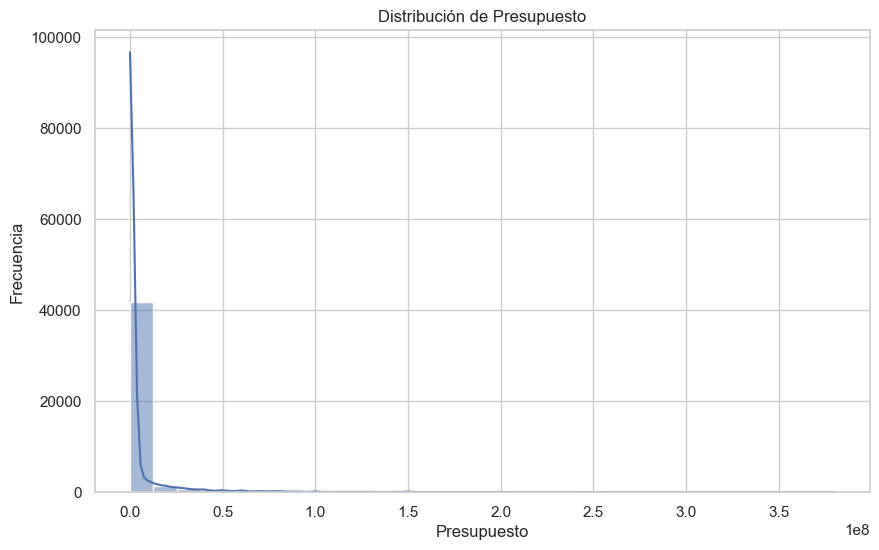

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_peliculas['budget'], bins=30, kde=True)
plt.title('Distribución de Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

Gráfico de correlación entre variables numéricas


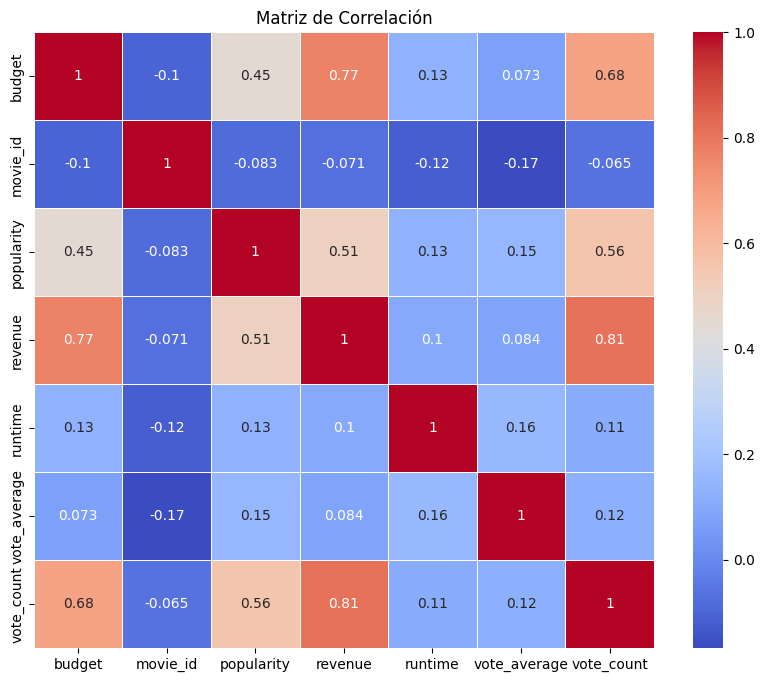

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_peliculas.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


genres_names_array
Drama              20265
Comedy             13182
Thriller            7624
Romance             6735
Action              6596
Horror              4673
Crime               4307
Documentary         3932
Adventure           3496
Science Fiction     3049
Family              2770
Mystery             2467
Fantasy             2313
Animation           1935
Foreign             1622
Music               1598
History             1398
War                 1323
Western             1042
TV Movie             767
Name: count, dtype: int64


C:\Users\jessi\AppData\Local\Temp\ipykernel_3928\3794540883.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index,palette=palette)


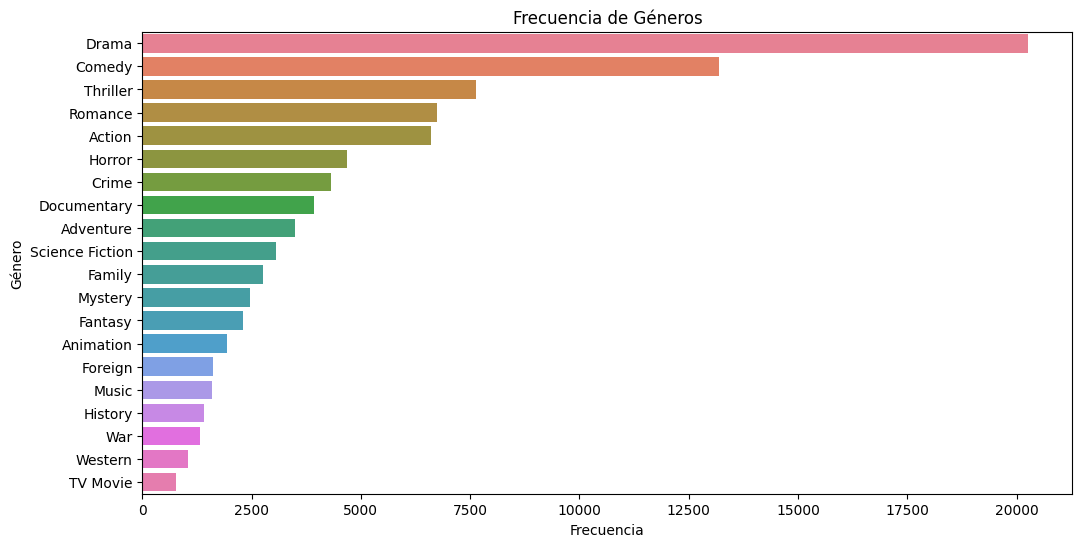

In [12]:
# Definir la función safe_eval
def safe_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return val
    return val

# Aplicar la función a la columna 'genres_names_array'
df_peliculas['genres_names_array'] = df_peliculas['genres_names_array'].apply(safe_eval)

# Eliminar duplicados en las columnas
df = df_peliculas.loc[:, ~df_peliculas.columns.duplicated()]

# Expandir todas las listas en una sola serie
all_genres = df_peliculas['genres_names_array'].explode()

# Calcular la frecuencia de cada género
genre_counts = all_genres.value_counts()

# Mostrar la frecuencia de cada género
print(genre_counts)

# Gráfico de barras de la frecuencia de cada género
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(genre_counts))
sns.barplot(x=genre_counts.values, y=genre_counts.index,palette=palette)
plt.title('Frecuencia de Géneros')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.show()
